In [289]:
import numpy as np
import matplotlib.pyplot as plt
sig_vi=1000 #initial vertical stress in kPa
sig_hi=500 #initial horizontal stress in kPa in both directions
sig_yx,sig_yz,sig_zx=0.0,0.0,0.0 #initial shear stress
g=25000 #shear modulus in kPa
k=400 #simple shear strength in kPa
# k_tri=0.5*np.sqrt(3)*k #triaxial shear strength in kPa
strain_rate=np.array([0.0]*(6)).reshape(6,1) #strain rate (in %)
strain_rate[3]=10**-5
strain_step=np.arange(10**-5,0.2+10**-5,10**-5)
# construct transformation matrix (convert conventional to transformed stress)
trans_f=np.array([0.0]*(6**2)).reshape(6,6)
trans_f[0,0],trans_f[0,1],trans_f[0,2]=1/3,1/3,1/3
trans_f[1,0],trans_f[1,1],trans_f[1,2]=-1/np.sqrt(6),2/np.sqrt(6),-1/np.sqrt(6)
trans_f[2,0],trans_f[2,2]=-1/np.sqrt(2),1/np.sqrt(2)
trans_f[3,3],trans_f[4,4],trans_f[5,5]=np.sqrt(2),np.sqrt(2),np.sqrt(2)
#construct initial stress and strain matrix
stress_i=np.array([0.0]*(6)).reshape(6,1)
stress_i[0],stress_i[1],stress_i[2],stress_i[3],stress_i[4],stress_i[5]=sig_hi,sig_vi,sig_hi,sig_yx,sig_yz,sig_zx
strain=np.array([0.0]*(6)).reshape(6,1)
#transform to transformed stress
stress_trans=np.matmul(trans_f,stress_i)
# mean_stress=stress_trans[0]
# stress_trans=stress_trans[1:]
stress_inc=np.array([0.0]*(6)).reshape(6,1) #define incremental stress array
sigx=[] #define empty list
sigy=[] #define empty list
sigxy=[] #define empty list

In [290]:
#main update loop
for i in range(len(strain_step)):
    f=0.5*sum(stress_trans[1:]**2)-k**2 #check below or on locus
    if f < 0:
        stress_inc=2*g*strain_rate
        stress_trans=stress_trans+stress_inc
#         temp=np.insert(stress_trans,0,mean_stress).reshape(6,1)
        cs=np.matmul(np.linalg.inv(trans_f),stress_trans)
        sigx.append(np.float64(cs[0]))
        sigy.append(np.float64(cs[1]))
        sigxy.append(np.float64(cs[3]))
    if f >= 0:
        stress_inc=2*g*(strain_rate-(1/k**2)*(np.matmul(np.transpose(strain_rate),stress_trans))*
                       stress_trans)
        stress_trans=stress_trans+stress_inc
#         temp=np.insert(stress_trans,0,mean_stress).reshape(6,1)
        cs=np.matmul(np.linalg.inv(trans_f),stress_trans)
        sigx.append(np.float64(cs[0]))
        sigy.append(np.float64(cs[1]))
        sigxy.append(np.float64(cs[3]))

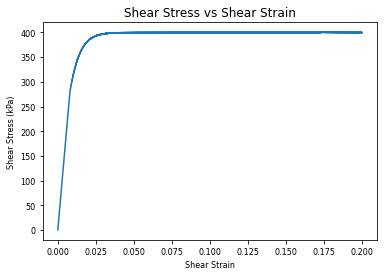

In [291]:
plt.plot(strain_step,sigxy)
plt.title('Shear Stress vs Shear Strain')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Shear Strain',fontsize=8)
plt.ylabel('Shear Stress (kPa)',fontsize=8)
# plt.savefig('shearvsstrain.png', bbox_inches='tight', dpi=600)
plt.show()


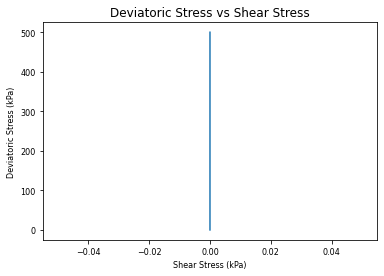

In [286]:
sigy=np.array((sigy))
sigx=np.array((sigx))
plt.plot(sigxy,(sigy-sigx))
plt.title('Deviatoric Stress vs Shear Stress')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Shear Stress (kPa)',fontsize=8)
plt.ylabel('Deviatoric Stress (kPa)',fontsize=8)
# plt.savefig('deviatoricvsshear.png', bbox_inches='tight', dpi=600)
plt.show()

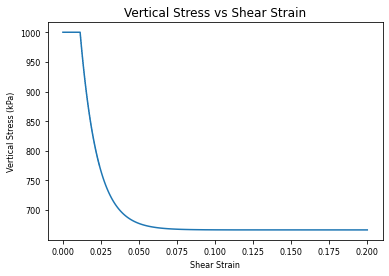

In [287]:
plt.plot(strain_step,sigy)
plt.title('Vertical Stress vs Shear Strain')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Shear Strain',fontsize=8)
plt.ylabel('Vertical Stress (kPa)',fontsize=8)
plt.savefig('verticalvsstrain.png', bbox_inches='tight', dpi=600)
plt.show()

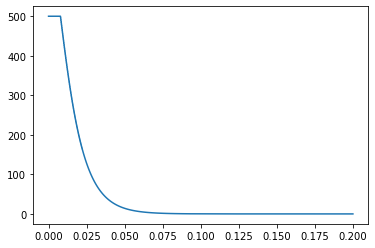

In [247]:
plt.plot(strain_step,sigx)

In [281]:
a=np.insert(stress_trans,0,mean_stress).reshape(6,1)
a

array([[666.66666667],
       [408.24829046],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ]])

In [282]:
stress_trans

array([[408.24829046],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ]])

In [280]:
mean_stress

array([666.66666667])